In [1]:
""" Gradient Descent """
# 기울기를 계속 측정하여 0 으로 수렴할 때까지 반복 계산하는 방법.
# a(알파) 는 learning rate 로, 한 번 계산하고 얼마만큼 더 내려가서 반복 계산할 것인지에 대한 수치

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

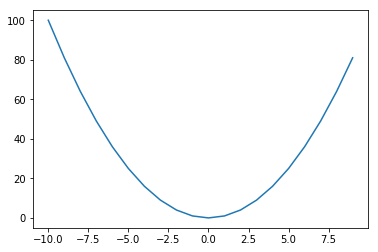

In [2]:
x = np.arange(-10, 10, 1)
f_x = x ** 2  # 미분값은 2 * x

plt.plot(x, f_x)
plt.show()

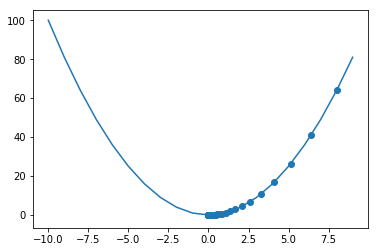

In [3]:
# gradient descent 알고리즘

x_new = 10
derivative = list()
y = list()
learning_rate = 0.1

for i in range(100):
    old_value = x_new
    x_new = old_value - learning_rate * 2 * old_value
    derivative.append(x_new)
    y.append(x_new ** 2)

plt.plot(x, f_x)
plt.scatter(derivative, y)
plt.show()

In [4]:
# learning rate 에 대한 선정 - 얼마나 많이 loop 을 돌 것인가?

# a 가 너무 작을 경우, 시간이 너무 오래 걸려서 끝가지 못간다.
# a 가 너무 클 경우, 데이터가 튀어서 수렴하지 못하는 경우가 생긴다.

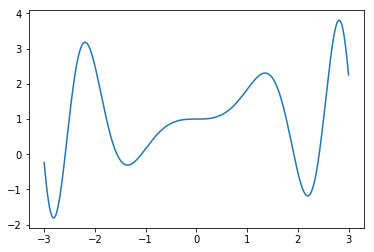

In [5]:
# 그렇다면 굴곡이 많은 함수의 경우는 ? (ex : x * sin(x**2) + 1)

# 여러 극솟값이 있을 경우, 처음 초기 x 값의 위치를 잘 조정해서 넣어야 한다.
# (잘 못 지정하면 수렴하지 않거나, 적절하지 않은 극솟값에 도달할 수 있다.)


def sin_function(x):
    return x * np.sin(x ** 2) + 1


def derivative_f(x):
    return np.sin(x ** 2) + 2 * (x ** 2) * np.cos(x ** 2)


x = np.arange(-3, 3, 0.001)
f_x = sin_function(x)

plt.plot(x, f_x)
plt.show()

In [6]:
""" Linear Regression with Gradient Descent """
# 목적은 cost function (J) 를 최소화 시켜줘야 하는 점에서 같다.

# 임의의 t1, t2 값으로 초기화 (theta)
# cost function J(t1, t2) 가 최소화 될 때까지 학습
# 더 이상 cost function 이 줄어들지 않거나, 학습 횟수를 초과할 때 종료

# x_new 가 theta (w_j) 라고 생각하면 된다.
# 중요한 것은, x_new 와 x_old 가 동시적으로 업데이트 된다는 것이다. (중요 !!)
# (old 값끼리 계산하고, new 값은 new 값들끼리 업데이트 된다는 의미.)

# learning rate, iteration 횟수 등, parameter 지정
# feature 가 많으면 normal equation 에 비해 상대적으로 빠르다. (사실은 체감 안된다.)
# 최적값에 수렴하지 않을 수도 있다. (그러나 대부분 수렴한다.)

' Linear Regression with Gradient Descent '

In [7]:
df = pd.read_excel("./slr06.xls", )
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


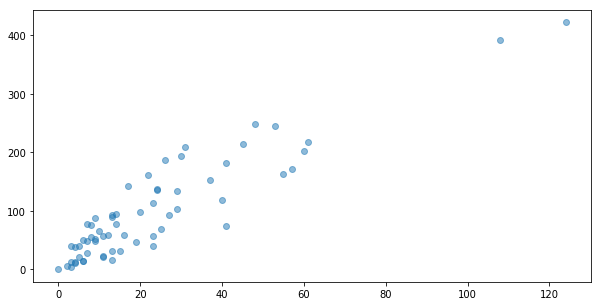

In [8]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

plt.figure(figsize=(10, 5))
plt.plot(raw_X, y, "o", alpha=0.5)
plt.show()

In [9]:
np.ones((len(raw_X), 1))[:3]

array([[1.],
       [1.],
       [1.]])

In [10]:
X = np.concatenate((np.ones((len(raw_X), 1)), raw_X), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [11]:
w = np.random.normal((2, 1))
w

array([ 1.31585732, -0.3035598 ])

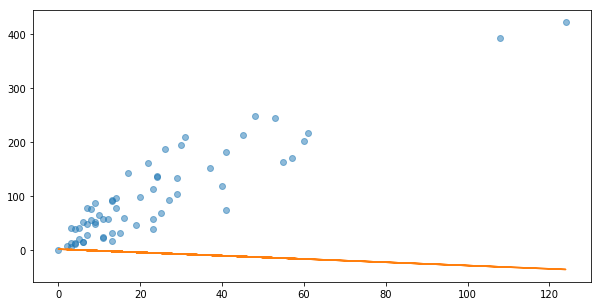

In [12]:
plt.figure(figsize=(10, 5))
y_predict = np.dot(X, w)
plt.plot(raw_X, y, "o", alpha=0.5)
plt.plot(raw_X, y_predict)
plt.show()

In [13]:
# >> hypothesis and cost function
def hypothesis_function(X, theta):
    return X.dot(theta)


def cost_function(h, y):
    return (1 / (2 * len(y))) * np.sum((h - y) ** 2)


h = hypothesis_function(X, w)
cost_function(h, y)

9723.144233124207

In [14]:
# >> gradient descent
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)

    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])

        if i % 10 == 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)

    return theta, theta_list, cost_list

In [15]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("Theta :", theta)
print("Cost :", cost)

Theta : [19.87600315  3.41638188]
Cost : 625.374514003439


In [16]:
theta_list[:10]

[[1.3158573157285927, -0.30355979719502546],
 [1.4196817248787754, 4.069475591593232],
 [1.5078847877296357, 3.8129931154382604],
 [1.6011097298062085, 3.8109801678585686],
 [1.693864553560946, 3.808977371248523],
 [1.7861516297245912, 3.806984674418218],
 [1.8779733170726778, 3.8050020264360955],
 [1.9693319624858168, 3.803029376627439],
 [2.060229901009679, 3.8010666745730735],
 [2.150669455914677, 3.7991138701080813]]

In [17]:
theta_list = np.array(theta_list)

In [18]:
cost_list[:5]

[9723.144233124207,
 747.0470525472068,
 711.7780186036982,
 710.9087423274493,
 710.0482111849625]

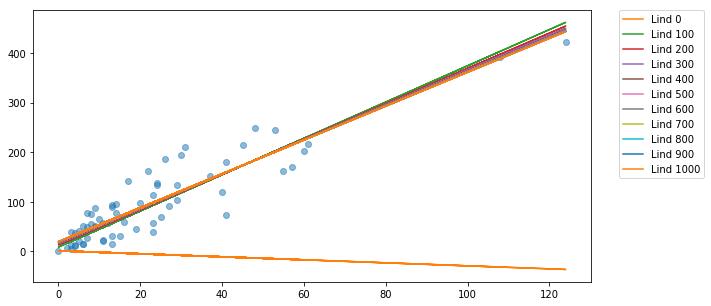

In [19]:
plt.figure(figsize=(10, 5))

y_predict_step = np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X, y, "o", alpha=0.5)

for i in range(0, len(cost_list), 100):
    plt.plot(raw_X, y_predict_step[:, i], label="Lind %d" % i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

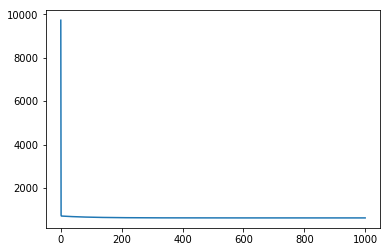

In [20]:
plt.plot(range(len(cost_list)), cost_list)
plt.show()

In [21]:
""" Multivariate Linear Regression """
# 두 개 이상의 feature 로 구성된 데이터를 분석할 때
# -> 식은 많아지지만 여전히 cost 함수의 최적화
# 아래에서의 w (weight) 는 theta 로 불린다.


# Compute cost for linear regression
def compute_cost(X, y, w):
    # Number of training samples
    m = y.size
    predictions = X.dot(w)
    sq_errors = (predictions - y)

    J = (1.0 / (2 * m)) * sq_errors.T.dot(sq_errors)
    return J


def minimize_gradient_fucntion(X, y, w, iterations=100000, alpha=0.01):
    m = y.size
    cost_history = []
    w_history = []

    for _ in range(iterations):
        predictions = X.dot(w)

        # 각각의 w 는 동시다발적으로 업데이트 된다. (w_old -> w_new)
        for i in range(w.size):
            x_n = X[:, i]  # X 의 i 번째 값을 x_n 이라는 list 에 담는다.
            errors_xi = (predictions - y) * x_n
            w[i] = w[i] - alpha * (1.0 / m) * errors_xi.sum()

        # 1000 번 돌 때마다 w 과 그 cost 값을 list 에 넣음
        if _ % 1000 == 0:
            w_history.append(w)
            cost_history.append(compute_cost(X, y, w))

    return w, np.array(cost_history), np.array(w_history)

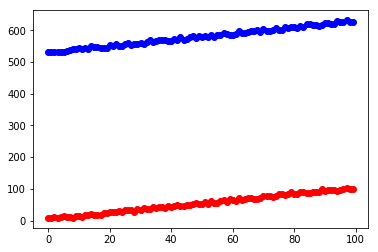

In [22]:
# x, y 의 generator
def gen_data(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 3))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = np.random.uniform(0, 1) * variance + i
        x[i][1] = np.random.uniform(0, 1) * variance + i
        x[i][2] = 1
        # our target variable
        y[i] = (i+bias) + np.random.uniform(0, 1) * variance + 500
    
    return x, y


x, y = gen_data(100, 25, 10)
plt.plot(x[:, 0:1], "ro")
plt.plot(y, "bo")

plt.show()

In [23]:
w_init = np.ones(3)

w, cost_history, w_history = minimize_gradient_fucntion(x, y, w_init, 300000, 0.0001)
print("W :", w)
print("\nCost History :")
print(cost_history[1:10])
print("...")
print(cost_history[-10:-1])
print("\nW History :")
print(w_history[1:10])
print("...")
print(w_history[-10:-1])

W : [5.51606958e-01 4.67119333e-01 5.23451103e+02]

Cost History :
[28070.62445476 26886.8097353  25760.00674621 24681.36367907
 23648.01712751 22657.95937552 21709.36315097 20800.49032202
 19929.67719543]
...
[5.409122   5.40409984 5.39928798 5.39467762 5.39026032 5.386028
 5.38197292 5.37808764 5.37436506]

W History :
[[5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]]
...
[[5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
 [5.51606958e-01 4.67119333e-01 5.23451103e+02]
